In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import xgboost
#PCA and KPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA

In [20]:
#import the data
untouched_clean = pd.read_csv("data/final_numeric", index_col='X')
untouched_clean.info()
print(untouched_clean.columns)
cleaned = untouched_clean.drop(columns=['Unnamed: 0'])
display(cleaned)
# cleaned = cleaned.dropna()
screen_time_vars=['text_wend','comp_wend','tv_wend','text_week','comp_week','tv_week']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13734 entries, 1 to 13734
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13734 non-null  int64  
 1   comp_bed_9         8174 non-null   float64
 2   mat_dep            11145 non-null  float64
 3   mat_age            13326 non-null  float64
 4   weight_16          5351 non-null   float64
 5   height_16          5364 non-null   float64
 6   iq                 7288 non-null   float64
 7   comp_noint_bed_16  471 non-null    float64
 8   comp_int_bed_16    2570 non-null   float64
 9   talk_phon_wend     4850 non-null   float64
 10  text_wend          4841 non-null   float64
 11  talk_mob_wend      4834 non-null   float64
 12  comp_wend          4839 non-null   float64
 13  musi_wend          4831 non-null   float64
 14  read_wend          4834 non-null   float64
 15  work_wend          4833 non-null   float64
 16  alon_wend          485

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
X,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,30.0,59.294132,181.602831,107.0,NaN,NaN,1.0,0.5,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,NaN,9.0,26.0,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,NaN,3.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.0,0.0
4,0.0,NaN,22.0,49.812426,160.224186,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0
5,0.0,8.0,31.0,62.270030,191.703227,132.0,1.0,NaN,0.0,0.0,...,NaN,NaN,NaN,1.0,0.0,1.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13730,NaN,13.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,0.0,0.0
13731,0.0,6.0,29.0,NaN,NaN,NaN,NaN,NaN,0.0,0.5,...,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,1.0,0.0
13732,NaN,21.0,37.0,58.075832,169.235565,108.0,NaN,NaN,1.0,1.5,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
tot = cleaned[screen_time_vars+['dep_score','dep_thoughts','has_dep_diag','prim_diag','secd_diag','panic_score']]
display(tot)
# display(tot.dropna())
tot=tot.dropna()
y = tot['has_dep_diag']
display(y)
x=cleaned.copy()

x=tot[screen_time_vars]
display(x)

,text_wend,comp_wend,tv_wend,text_week,comp_week,tv_week,dep_score,dep_thoughts,has_dep_diag,prim_diag,secd_diag,panic_score
X,,,,,,,,,,,,
1,0.5,1.5,1.5,0.5,1.5,1.5,0.0,NaN,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.5,3.5,0.0,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13731,0.5,1.5,3.5,0.5,1.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN
13732,1.5,1.5,3.5,1.5,1.5,3.5,NaN,NaN,NaN,NaN,NaN,NaN


X
19       0.0
34       0.0
67       1.0
68       0.0
77       0.0
        ... 
13686    0.0
13695    0.0
13702    0.0
13721    0.0
13726    1.0
Name: has_dep_diag, Length: 1254, dtype: float64

,text_wend,comp_wend,tv_wend,text_week,comp_week,tv_week
X,,,,,,
19,0.5,1.5,1.5,0.5,0.5,0.5
34,3.5,1.5,1.5,3.5,1.5,0.5
67,1.5,0.0,0.5,0.5,0.5,0.5
68,3.5,3.5,3.5,3.5,1.5,1.5
77,0.5,3.5,0.5,0.5,1.5,1.5
...,...,...,...,...,...,...
13686,1.5,1.5,0.5,1.5,1.5,1.5
13695,0.5,3.5,1.5,0.5,3.5,0.5
13702,1.5,0.0,1.5,1.5,3.5,1.5


In [8]:
y['has_dep_diag'].value_counts()
# x['panic_score'].value_counts()

0.0    917
1.0    217
Name: has_dep_diag, dtype: int64

In [29]:
linear_t  = PCA(n_components=2, random_state=1)
poly_t    = KernelPCA(n_components=2, random_state=1, kernel='poly')
rbf_t     = KernelPCA(n_components=2, random_state=1, kernel='rbf')
sigmoid_t = KernelPCA(n_components=2, random_state=1, kernel='sigmoid')
cosine_t  = KernelPCA(n_components=2, random_state=1, kernel='cosine')

linear_x  = linear_t.fit_transform(x)

poly_x    = poly_t.fit_transform(x)
print(poly_x)
rbf_x     = rbf_t.fit_transform(x)
sigmoid_x = sigmoid_t.fit_transform(x)
consine_x = cosine_t.fit_transform(x)



[[-7.63767795 -1.40605985]
 [ 2.49455265 -9.92085392]
 [-8.32067256 -2.4580645 ]
 ...
 [-3.38961317 -1.61672911]
 [-4.95221046  1.0568292 ]
 [-4.95221046  1.0568292 ]]


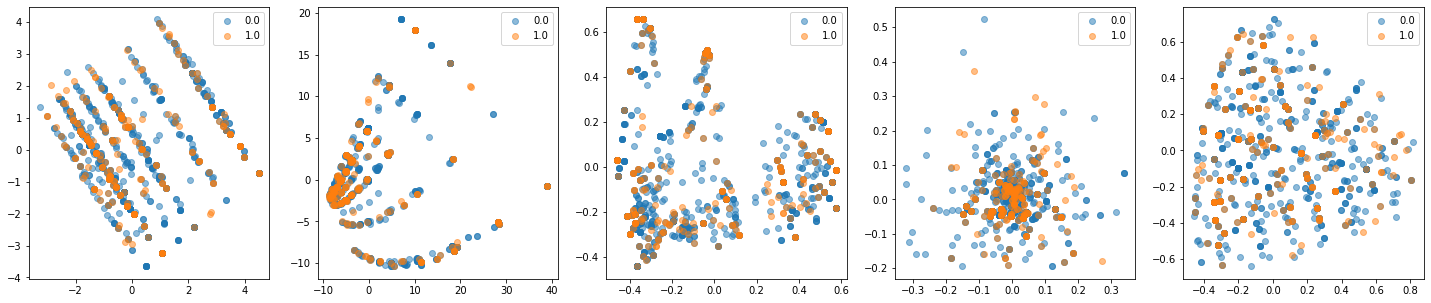

In [31]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1, 5, figsize=(25,5))

for l in np.unique(y):
    ax1.scatter(linear_x[y==l,0],   linear_x[y==l,1],   label =l, alpha=0.5)
    ax2.scatter(poly_x[y==l, 0],    poly_x[y==l, 1],    label=l, alpha=0.5)
    ax3.scatter(rbf_x[y==l, 0],     rbf_x[y==l, 1],     label=l, alpha=0.5)
    ax4.scatter(sigmoid_x[y==l, 0], sigmoid_x[y==l, 1], label=l, alpha=0.5)
    ax5.scatter(consine_x[y==l, 0], consine_x[y==l, 1], label=l, alpha=0.5)


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()